# Combined Assignments for DSP505


### Lab 1 – Practice Problems

In Lab 1 you tackle a series of fundamental programming challenges:

- **List iteration:** iterate two Python lists simultaneously, printing elements from the first list in order and from the second list in reverse until the shorter list finishes, then print remaining elements.
- **Word search:** determine whether a given word appears horizontally or vertically in a 2D character board.
- **Matrix rotation:** rotate an \(n	imes n\) matrix 90° clockwise in-place.
- **Sudoku validation:** check if a partially filled 9×9 Sudoku grid is valid according to Sudoku rules.


In [1]:
# This cell prompts the user for the lengths and elements of two lists, then iterates through them simultaneously, printing elements from list1 in original order paired with elements from list2 in reverse order, and finally prints any remaining elements.
n1 = int(input("Enter the size of list1  "))
n2 = int(input("Enter the size of list2  "))
list1 = []
list2 = []

print("Enter the elements of list1 : \n")
for i in range(n1):
  val = int(input())
  list1.append(val)

print("Enter the elements of list2 : \n")
for j in range(n2):
  val = int(input())
  list2.append(val)


list2.reverse()

print('\n')

i=j=0
if(n1<n2):
  for i in range(n1):
    print(list1[i],list2[i])
    print('\n')

  for j in range(n1,n2):
    print(list2[j])
    print('\n')


elif(n1>n2):

  for i in range(n2):
    print(list1[i],list2[i])
    print('\n')

  for j in range(n2,n1):
    print(list1[j])
    print('\n')



Enter the size of list1   4
Enter the size of list2   6


Enter the elements of list1 : 



 10
 20
 30
 40


Enter the elements of list2 : 



 1
 10
 100
 200
 300
 400




10 400


20 300


30 200


40 100


10


1




In [2]:
# This cell checks whether a given word exists horizontally or vertically in a 2D board.
Board = [
    ['A', 'B', 'C', 'E'],
    ['S', 'F', 'C', 'S'],
    ['A', 'D', 'E', 'E']
]

Word = "FD"

row = len(Board)
col = len(Board[0])
flag = False

for i in range(row):
    for j in range(col):

        if (j + len(Word) <= col):
            horizontal_string = ""
            for k in range(len(Word)):
                horizontal_string += Board[i][j + k]
            if horizontal_string == Word:
                flag = True
                break



        if i + len(Word) <= row:
            vertical_string = ""
            for k in range(len(Word)):
                vertical_string += Board[i + k][j]
            if vertical_string == Word:
                flag = True
                break

    if flag:
        break

print(flag)


True


In [3]:
# This cell rotates a square matrix by 90 degrees clockwise in-place.
matrix = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

n = len(matrix)

for i in range(n):
    for j in range(i + 1, n):
        temp1 = matrix[i][j]
        matrix[i][j] = matrix[j][i]
        matrix[j][i] = temp1



for i in range(n):
    l = 0
    h = n - 1
    while l < h:
        temp2 = matrix[i][l]
        matrix[i][l] = matrix[i][h]
        matrix[i][l] = temp2
        l += 1
        h-= 1

print(matrix)


[[1, 4, 7], [2, 5, 8], [3, 6, 9]]


In [4]:
# This cell validates whether a given 9x9 Sudoku board configuration is valid according to Sudoku rules.
board = [
    ["5","3",".",".","7",".",".",".","."],
    ["6",".",".","1","9","5",".",".","."],
    [".","9","8",".",".",".",".","6","."],
    ["8",".",".",".","6",".",".",".","3"],
    ["4",".",".","8",".","3",".",".","1"],
    ["7",".",".",".","2",".",".",".","6"],
    [".","6",".",".",".",".","2","8","."],
    [".",".",".","4","1","9",".",".","5"],
    [".",".",".",".","8",".",".","7","9"]
]

valid = True


for i in range(9):
    seen = []
    for j in range(9):
        val = board[i][j]
        if val != ".":
            if (val in seen):
                valid = False
                break
            seen.append(val)
    if not valid:
        break

if valid:
    for j in range(9):
        seen = []

        for i in range(9):
            val = board[i][j]
            if (val != "."):
                if (val in seen):
                    valid = False
                    break
                seen.append(val)

        if (not valid):
            break


if valid:
    for box_row in range(0, 9, 3):
        for box_col in range(0, 9, 3):
            seen = []

            for i in range(box_row, box_row + 3):
                for j in range(box_col, box_col + 3):
                    val = board[i][j]
                    if (val != "."):
                        if (val in seen):
                            valid = False
                            break
                        seen.append(val)

                if (not valid):
                    break

            if (not valid):
                break

print(valid)


True


### Lab 2 – Object‑Oriented Programming

This lab focuses on using object‑oriented programming to design a simple shopping cart system.  You must implement `Product`, `CartItem`, `ShoppingCart`, and `Customer` classes with attributes and methods to manage stock, add or remove products from the cart, compute totals, and perform checkout operations.  Constraints ensure you cannot add more items than are in stock, handle duplicate products gracefully, and clear the cart after checkout.


In [5]:
# Defines Product, CartItem, ShoppingCart, and Customer classes to implement a simple e-commerce backend with stock management, cart operations, and checkout functionality.

class Product:
    def __init__(self, name, price, initial_stock, product_id=None):
        self.name = name
        self.price = price
        self.stock = initial_stock
        self.product_id = product_id

    def update_stock(self, quantity):
        if self.stock + quantity < 0:
            print("Not enough stock for:", self.name)
            return False
        self.stock += quantity
        return True

    def is_available(self, requested_quantity):
        return requested_quantity >= 0 and self.stock >= requested_quantity


class CartItem:
    def __init__(self, product, quantity_added):
        if quantity_added <= 0:
            raise ValueError("Quantity must be positive.")
        self.product = product
        self.quantity_added = quantity_added

    def get_total_price(self):
        return self.product.price * self.quantity_added


class ShoppingClass:
    def __init__(self, dict):
        self.dict = {}

    def add_product(self, CartItem):
        product = CartItem.product
        qty_to_add = CartItem.quantity_added

        if product.name in self.dict:
            current_item = self.dict[product.name]
            new_qty = current_item.quantity_added + qty_to_add
            if product.is_available(new_qty):
                current_item.quantity_added = new_qty
            else:
                print("Cannot add more. In stock:", product.stock, "Requested:", new_qty)
        else:
            if product.is_available(qty_to_add):
                self.dict[product.name] = CartItem
            else:
                print("Cannot add", qty_to_add, product.name, "Only", product.stock, "left.")

    def remove_product(self, product):
        if product.name in self.dict:
            del self.dict[product.name]

    def update_quantity(self, product, new_quantity):
        if new_quantity <= 0:
            print("Quantity must be positive.")
            return
        if product.name in self.dict:
            if product.is_available(new_quantity):
                self.dict[product.name].quantity_added = new_quantity
            else:
                print("Cannot set", product.name, "to", new_quantity, "- only", product.stock, "in stock.")

    def get_total_bill(self):
        total_bill = 0
        for item in self.dict.values():
            total_bill += item.get_total_price()
        return total_bill

    def view_cart(self):
        if not self.dict:
            return "Cart is empty."
        lines = []
        lines.append(f"{'Item':<28}{'Qty':>6}{'Unit(₹)':>10}{'Total(₹)':>12}")
        lines.append("-" * 56)
        total = 0
        for item in self.dict.values():
            name = item.product.name
            if len(name) > 27:
                name = name[:25] + "…"
            qty = item.quantity_added
            unit = item.product.price
            line_total = item.get_total_price()
            total += line_total
            lines.append(f"{name:<28}{qty:>6}{unit:>10}{line_total:>12}")
        lines.append("-" * 56)
        lines.append(f"{'Total Bill =':<44}{total:>12}")
        return "\n".join(lines)

    def checkout(self, product):
        for item in self.dict.values():
            if not item.product.is_available(item.quantity_added):
                print("Not enough stock during checkout for:", item.product.name)
                return 0

        for item in self.dict.values():
            ok = item.product.update_stock(-item.quantity_added)
            if not ok:
                print("Error while updating stock for:", item.product.name)
                return 0

        total = self.get_total_bill()
        self.dict.clear()
        return total


class Customer:
    def __init__(self, name, age, shopping_cart):
        self.name = name
        self.age = age
        self.shopping_cart = shopping_cart

    def add_product(self, product, quantity=1):
        try:
            cart_item = CartItem(product, quantity)
            self.shopping_cart.add_product(cart_item)
        except ValueError as e:
            print("Add failed:", e)

    def remove_product(self, product):
        self.shopping_cart.remove_product(product)



def show_inventory_items(title, items_list):
    print(f"\n== {title} ==")
    print(f"{'ID':<8}{'Name':<28}{'Price(₹)':>10}{'Qty':>8}")
    print("-" * 54)
    for p in items_list:
        name = p.name if len(p.name) <= 27 else (p.name[:25] + "…")
        print(f"{str(p.product_id):<8}{name:<28}{p.price:>10}{p.stock:>8}")


if __name__ == "__main__":
    inventory = [

        Product("Wireless Mouse", 599, 12, "E101"),
        Product("Keyboard", 999, 10, "E102"),
        Product("Smart TV 43-inch", 29999, 3, "E103"),
        Product("Bluetooth Earbuds", 1499, 20, "E104"),
        Product("Power Bank 10000mAh", 1999, 15, "E107"),

        Product("Basmati Rice 5kg", 599, 30, "G201"),
        Product("Full Cream Milk 1L", 65, 50, "G202"),
        Product("Eggs (Dozen)", 80, 40, "G203"),
        Product("Apples 1kg", 180, 25, "G204"),

        Product("Office Chair", 3499, 8, "F301"),
        Product("Coffee Table", 2499, 5, "F302"),

        Product("T-Shirt", 399, 25, "C401"),
        Product("Jeans", 1299, 15, "C402"),
    ]


    show_inventory_items("All Items", inventory)


    cart_sarvesh = ShoppingClass({})
    cart_rohan = ShoppingClass({})

    sarvesh = Customer("Sarvesh", 24, cart_sarvesh)
    rohan = Customer("Rohan", 23, cart_rohan)

    def get_by_id(pid):
        for p in inventory:
            if p.product_id == pid:
                return p
        return None


    print("\n--- Customer 1(Sarvesh)  ---")
    sarvesh.add_product(get_by_id("E101"), 2)
    sarvesh.add_product(get_by_id("C401"), 3)
    sarvesh.add_product(get_by_id("G201"), 1)
    print(cart_sarvesh.view_cart())

    cart_sarvesh.update_quantity(get_by_id("C401"), 4)
    print("\nAfter updating T-Shirt to 4:")
    print(cart_sarvesh.view_cart())
    bill_sarvesh = cart_sarvesh.checkout(product=None)
    print("Sarvesh paid: ₹", bill_sarvesh)

    print("\n--- Customer 2(Rohan)  ---")
    rohan.add_product(get_by_id("E103"), 5)
    rohan.add_product(get_by_id("E103"), 1)
    rohan.add_product(get_by_id("F301"), 2)
    rohan.add_product(get_by_id("G202"), 6)
    print(cart_rohan.view_cart())

    cart_rohan.update_quantity(get_by_id("G202"), 1000)

    cart_rohan.update_quantity(get_by_id("G202"), 10)

    rohan.remove_product(get_by_id("F301"))
    print("\nAfter fixing milk and removing chair:")
    print(cart_rohan.view_cart())
    bill_rohan = cart_rohan.checkout(product=None)
    print("Rohan paid: ₹", bill_rohan)


    print("\nStock after purchases:")
    for pid in ["E101", "C401", "G201", "E103", "G202", "F301"]:
        p = get_by_id(pid)
        print(p.product_id, "-", p.name, ":", p.stock)



== All Items ==
ID      Name                          Price(₹)     Qty
------------------------------------------------------
E101    Wireless Mouse                     599      12
E102    Keyboard                           999      10
E103    Smart TV 43-inch                 29999       3
E104    Bluetooth Earbuds                 1499      20
E107    Power Bank 10000mAh               1999      15
G201    Basmati Rice 5kg                   599      30
G202    Full Cream Milk 1L                  65      50
G203    Eggs (Dozen)                        80      40
G204    Apples 1kg                         180      25
F301    Office Chair                      3499       8
F302    Coffee Table                      2499       5
C401    T-Shirt                            399      25
C402    Jeans                             1299      15

--- Customer 1(Sarvesh)  ---
Item                           Qty   Unit(₹)    Total(₹)
--------------------------------------------------------
Wireless Mouse

### Lab 3 – NumPy Practice

Lab 3 exercises your NumPy skills through two problem sets:

**Problem Set 1**
- Convert a list of baseball player heights to a NumPy array, convert the heights to metres, and print the results【573495246635617†L191-L204】.
- Convert a list of weights from pounds to kilograms and compute each player's BMI【573495246635617†L206-L219】.
- Create a boolean array indicating which players have BMI < 21 and use it to filter the BMI array【573495246635617†L221-L231】.
- Represent player height and weight as a 2D array and examine its type and shape【573495246635617†L232-L241】.
- Generate simulated height, weight, and age data for 1000 players and compute mean/median heights【573495246635617†L246-L264】.

**Problem Set 2**
- Generate a 6×8 sales matrix and compute weekly totals, find the best‑selling product, identify the top two weeks for each product, and create a boolean mask showing where sales exceed the overall average【573495246635617†L267-L284】.


In [6]:
# Importing the NumPy library for numerical computations.
import numpy as np

In [7]:
# Marker cell indicating the start of Problem Set 1.
# Problem Set - 1

In [10]:
# Converts a list of player heights (in centimeters) into a NumPy array.
# Q1
baseball = [180,215,210,210,188,176,209,200]
np_height_in = np.array(baseball)
type(np_height_in)

numpy.ndarray

In [11]:
# Prints the height array and converts heights from centimeters to meters.
# Q2
print(np_height_in)
np_height_m = np_height_in * 0.01
print(np_height_m)

[180 215 210 210 188 176 209 200]
[1.8  2.15 2.1  2.1  1.88 1.76 2.09 2.  ]


In [12]:
# Converts weights from pounds to kilograms and computes the BMI for each player.
# Q3
Weight_lb=[172,190,165,175,166,159,182,168]
Weight_lb_in = np.array(Weight_lb)
np_weight_kg = Weight_lb_in * 0.453592

print(np_weight_kg)

BMI = np_weight_kg / (np_height_m * np_height_m)
print(BMI)


[78.017824 86.18248  74.84268  79.3786   75.296272 72.121128 82.553744
 76.203456]
[24.07957531 18.64412764 16.97112925 17.99968254 21.30383431 23.28290548
 18.89923399 19.050864  ]


In [13]:
# Creates a boolean mask indicating which players have BMI below 21 and prints their BMIs.
# Q4
light = BMI<21
print(light)
print(BMI[light])

[False  True  True  True False False  True  True]
[18.64412764 16.97112925 17.99968254 18.89923399 19.050864  ]


In [14]:
# Creates a 2D NumPy array of players’ height and weight, and prints its type, dimensions, and shape.
# Q5
baseball=[[180,78.4],[215,102.7],[210,98.5],[188,75.2]]
np_baseball = np.array(baseball)
print(type(np_baseball))
print(np_baseball.ndim,  np_baseball.shape,  np_baseball.dtype,sep ="    ")

<class 'numpy.ndarray'>
2    (4, 2)    float64


In [15]:
# Generates random height, weight, and age data for 1000 players, stacks them into a single array, and computes the mean and median height.
# Q6
height = np.round(np.random.normal(1.75, 0.20, 1000), 2)
weight = np.round(np.random.normal(60.32, 15, 1000), 2)
age = np.round(np.random.normal(30, 10, 1000), 0)

np_players = np.column_stack((height, weight, age))
np_height = np_players[:,0]

mean_height = np.mean(np_height)
median_height = np.median(np_height)

print(f"Mean height: {mean_height}")
print(f"Median height: {median_height}")

Mean height: 1.7488800000000002
Median height: 1.75


In [16]:
# Marker cell indicating the start of Problem Set 2.
# Problem Set 2

In [17]:
# Generates a 2D array of random sales data for 6 products over 8 weeks and prints the data.
sales_data = np.random.randint(50, 201, size=(6, 8))
print(sales_data)
# Products as Rows and Weeks as Columns

[[ 54 195 163 180  77 184 150  53]
 [111 174 200 123  61 119  64 174]
 [ 76 113  98  82 122 102  81 121]
 [ 70 194  60 100 176 150 173 183]
 [170  63 199 107  70  84 164 191]
 [ 90 109 146 135  68 146  77 117]]


In [18]:
# Computes weekly total sales (column-wise sum).
# a
weekly_total_sales = np.sum(sales_data, axis=0)
print(weekly_total_sales)

[571 848 866 727 574 785 709 839]


In [19]:
# Computes total sales for each product (row-wise sum) and identifies the best selling product.
# b
product_total_sales = np.sum(sales_data, axis=1)
print(product_total_sales)
best_selling_product_index = np.argmax(product_total_sales)
print(f"Best selling product is : Product {best_selling_product_index+1}")

[1056 1026  795 1106 1048  888]
Best selling product is : Product 4


In [20]:
# Prints the length of the sales data array (number of products).
len(sales_data)

6

In [21]:
# Finds the indices of the top two weeks for each product and prints sales for those weeks.
# c
top_weeks_indices = np.argsort(sales_data, axis=1)[:, -2:]
top_weeks_indices = np.sort(top_weeks_indices)
Top_2_weeks = np.sort(top_weeks_indices)+1
print(Top_2_weeks)
for i in range(len(sales_data)):
    sales_week_1 = sales_data[i][top_weeks_indices[i, 0]]
    sales_week_2 = sales_data[i][top_weeks_indices[i, 1]]
    print(f"Product : {i+1} :- Week {Top_2_weeks[i][0]} (Sales: {sales_week_1}), Week {Top_2_weeks[i][1]} (Sales: {sales_week_2})" )

[[2 6]
 [3 8]
 [5 8]
 [2 8]
 [3 8]
 [3 6]]
Product : 1 :- Week 2 (Sales: 195), Week 6 (Sales: 184)
Product : 2 :- Week 3 (Sales: 200), Week 8 (Sales: 174)
Product : 3 :- Week 5 (Sales: 122), Week 8 (Sales: 121)
Product : 4 :- Week 2 (Sales: 194), Week 8 (Sales: 183)
Product : 5 :- Week 3 (Sales: 199), Week 8 (Sales: 191)
Product : 6 :- Week 3 (Sales: 146), Week 6 (Sales: 146)


In [22]:
# Computes overall average sales and creates a boolean mask showing where sales exceed the average.
overall_average_sales = np.mean(sales_data)
sales_above_average_mask = sales_data > overall_average_sales
print(f"Overall average sales: {overall_average_sales}")
print("Boolean mask for sales above overall average:")
print(sales_above_average_mask)

Overall average sales: 123.3125
Boolean mask for sales above overall average:
[[False  True  True  True False  True  True False]
 [False  True  True False False False False  True]
 [False False False False False False False False]
 [False  True False False  True  True  True  True]
 [ True False  True False False False  True  True]
 [False False  True  True False  True False False]]


### Lab 4 – Pandas Exercises (Part 1)

In this part you explore a supermarket purchase dataset and practise DataFrame slicing and aggregation:

- Load a CSV into a DataFrame, inspect its head and data types, and slice rows and columns in various ways.
- Compute basic statistics such as average and maximum price, number of unique products, and the difference between mean and median total purchase amounts.
- Add and drop columns, convert the time column to a datetime, extract day of week and month, and count purchases on Wednesdays.
- Work with the Titanic dataset: rename columns, set and reset the index, count missing ages, compute the mean age, fill missing values, and find the average age of the five oldest passengers.


# Part 1

The file "Purchase_Data.csv" contains purchase data at a Chinese supermarket for various products.  Read this csv into a dataframe called df_data and use the head() method to check that you have read in the data correctly. Make sure you import pandas.

In [23]:
# Loads the purchase data CSV into a DataFrame and displays the first 10 rows.
import pandas as pd
df_data = pd.read_csv('Lab4_Purchase_Data.csv')

df_data.head(10)


,invoice_number,invoice_time,store_id,product_id,category_id,num_item,price
0,2.020000e+11,7/15/15 10:45,G816,7000300,210101,1.0,2.0
1,2.020000e+11,7/15/15 12:16,G816,7070884,70203,1.0,2.0
2,2.020000e+11,7/15/15 12:16,G816,7070884,70203,1.0,2.0
3,2.020000e+11,7/15/15 12:16,G816,7070891,70401,1.0,6.0
4,2.020000e+11,7/15/15 12:16,G816,7090363,70401,1.0,6.0
5,2.020000e+11,7/15/15 14:10,G816,7000300,210101,1.0,2.0
6,2.020000e+11,7/15/15 15:28,G816,7000126,210301,1.0,2.0
7,2.020000e+11,7/15/15 16:20,G816,7308017,210101,1.0,3.5
8,2.020000e+11,7/15/15 16:22,G816,15000231,70301,1.0,2.0
9,2.020000e+11,7/15/15 16:24,628,7000300,210101,1.0,2.0


Use the dtypes attribute to view how each column is stored

In [24]:
# Displays the data types of each column in the purchase DataFrame.
df_data.dtypes


invoice_number    float64
invoice_time       object
store_id           object
product_id          int64
category_id         int64
num_item          float64
price             float64
dtype: object

Slice the first two columns using .loc and store the result in a variable called result_1.

In [25]:
# Slices the DataFrame to select the first two columns.
result_1 = df_data.loc[:,"invoice_number":"invoice_time"]
result_1


,invoice_number,invoice_time
0,2.020000e+11,7/15/15 10:45
1,2.020000e+11,7/15/15 12:16
2,2.020000e+11,7/15/15 12:16
3,2.020000e+11,7/15/15 12:16
4,2.020000e+11,7/15/15 12:16
...,...,...
5377,2.020000e+11,9/5/15 23:07
5378,2.020000e+11,9/5/15 23:23
5379,2.020000e+11,9/5/15 23:24
5380,2.020000e+11,9/5/15 23:32


Slice the first two rows using .loc and store the result in a variable called result_2.

In [26]:
# Slices the DataFrame to select the first two rows.
result_2 = df_data.loc[0:1,:]
result_2


,invoice_number,invoice_time,store_id,product_id,category_id,num_item,price
0,2.020000e+11,7/15/15 10:45,G816,7000300,210101,1.0,2.0
1,2.020000e+11,7/15/15 12:16,G816,7070884,70203,1.0,2.0


Slice the first four rows and the first five columns and store the result in a variable called result_3.

In [27]:
# Selects the first four rows and first five columns of the DataFrame.
result_3 = df_data.loc[0:3,"invoice_number":"category_id"]
result_3

,invoice_number,invoice_time,store_id,product_id,category_id
0,2.020000e+11,7/15/15 10:45,G816,7000300,210101
1,2.020000e+11,7/15/15 12:16,G816,7070884,70203
2,2.020000e+11,7/15/15 12:16,G816,7070884,70203
3,2.020000e+11,7/15/15 12:16,G816,7070891,70401


Slice rows 0,4,6 and columns invoice time and price and store the result in variable called result_4.

In [28]:
# Selects specific rows (0, 4, 6) and columns (invoice_time and price).
result_4 = df_data.loc[[0,4,6],["invoice_time","price"]]
result_4

,invoice_time,price
0,7/15/15 10:45,2.0
4,7/15/15 12:16,6.0
6,7/15/15 15:28,2.0


Store the number rows in a variable called num_rows.

In [29]:
# Stores the number of rows in the variable num_rows.
num_rows = df_data.shape[0]
num_rows


5382

In [30]:
# Alternative way of computing the number of rows using len().
rows = len(df_data)
rows

5382

Print out the last row of the data to dataframe. **Hint:** use the variable num_rows from the previous exercise.

In [31]:
# Prints the last row of the DataFrame using the computed number of rows.
df_data.loc[num_rows-1,:]


invoice_number    202000000000.0
invoice_time        9/5/15 23:38
store_id                    G619
product_id              23030206
category_id               210101
num_item                     1.0
price                        2.0
Name: 5381, dtype: object

# Part 2

Compute the average and max price charged.  Store the results in variables called avg_price and max_price

In [32]:
# Computes the average and maximum price charged.
avg_price = df_data.price.mean()
max_price = df_data.price.max()
print(avg_price,max_price)


3.1920522110741363 6.01


Compute the average price and average number of items purchased with only a single call to the mean() method. Store these averages in avg_price and avg_num_items.

In [33]:
# Computes the average price and average number of items purchased with a single call to mean().
avg_price,avg_num_items = df_data[['price','num_item']].mean()
print(avg_price,avg_num_items)


3.1920522110741363 1.2983091787439613


Create a column called "total", which is the product of the price and num_item columns.

In [34]:
# Creates a new column total as the product of price and num_item and displays the updated DataFrame.
df_data["total"] = df_data['price'] * df_data['num_item']
df_data.head()


,invoice_number,invoice_time,store_id,product_id,category_id,num_item,price,total
0,2.020000e+11,7/15/15 10:45,G816,7000300,210101,1.0,2.0,2.0
1,2.020000e+11,7/15/15 12:16,G816,7070884,70203,1.0,2.0,2.0
2,2.020000e+11,7/15/15 12:16,G816,7070884,70203,1.0,2.0,2.0
3,2.020000e+11,7/15/15 12:16,G816,7070891,70401,1.0,6.0,6.0
4,2.020000e+11,7/15/15 12:16,G816,7090363,70401,1.0,6.0,6.0


What is the avgerage price of the three most expensive purchases?

In [35]:
# Calculates the average price of the three most expensive purchases.
sort_purchase = df_data['price'].sort_values()
avg = sort_purchase[-4:-1].sum() /3.0
avg


6.0

How many different products are there?

In [36]:
# Determines how many different products there are using the unique() method.
arr = df_data['product_id'].unique()
len(arr)

53

Find the difference between the mean and median of the column total.  Use the describe() method and then index the dataframe it returns.

In [37]:
# Computes the difference between the mean and median of the total column.
Diff = df_data['total'].mean() - df_data['total'].median()
Diff

0.9318078781127839

Use the drop() method to delete the column total from the dataframe df_data.

In [38]:
# Drops the total column from the DataFrame.
df_data.drop(columns = 'total')


,invoice_number,invoice_time,store_id,product_id,category_id,num_item,price
0,2.020000e+11,7/15/15 10:45,G816,7000300,210101,1.0,2.0
1,2.020000e+11,7/15/15 12:16,G816,7070884,70203,1.0,2.0
2,2.020000e+11,7/15/15 12:16,G816,7070884,70203,1.0,2.0
3,2.020000e+11,7/15/15 12:16,G816,7070891,70401,1.0,6.0
4,2.020000e+11,7/15/15 12:16,G816,7090363,70401,1.0,6.0
...,...,...,...,...,...,...,...
5377,2.020000e+11,9/5/15 23:07,300,7308017,210101,1.0,3.0
5378,2.020000e+11,9/5/15 23:23,G619,7070891,70401,1.0,6.0
5379,2.020000e+11,9/5/15 23:24,G619,7071096,70201,1.0,5.0
5380,2.020000e+11,9/5/15 23:32,G619,15000231,70301,2.0,2.0


Let's dig a little deeper into the data set and answer some basic question.

First, covert the column invoice time to a datetime column. Print out the new column types to make sure this was done correctly

In [39]:
# Converts the invoice_time column to datetime.
df_data['invoice_time'] = pd.to_datetime(df_data['invoice_time'], format="%m/%d/%y %H:%M", errors = "coerce")
df_data.head()


,invoice_number,invoice_time,store_id,product_id,category_id,num_item,price,total
0,2.020000e+11,2015-07-15 10:45:00,G816,7000300,210101,1.0,2.0,2.0
1,2.020000e+11,2015-07-15 12:16:00,G816,7070884,70203,1.0,2.0,2.0
2,2.020000e+11,2015-07-15 12:16:00,G816,7070884,70203,1.0,2.0,2.0
3,2.020000e+11,2015-07-15 12:16:00,G816,7070891,70401,1.0,6.0,6.0
4,2.020000e+11,2015-07-15 12:16:00,G816,7090363,70401,1.0,6.0,6.0


Next, let's create columns called "DOW" and "Month", which store the corresponding weekday and month of the invoice respectively.  Print the head of the dataframe to make sure this was done correctly.

In [40]:
# Creates new columns DOW and Month based on invoice_time.
df_data["DOW"] = df_data["invoice_time"].dt.day_name() 
df_data["Month"] = df_data["invoice_time"].dt.month_name() 
df_data.head()


,invoice_number,invoice_time,store_id,product_id,category_id,num_item,price,total,DOW,Month
0,2.020000e+11,2015-07-15 10:45:00,G816,7000300,210101,1.0,2.0,2.0,Wednesday,July
1,2.020000e+11,2015-07-15 12:16:00,G816,7070884,70203,1.0,2.0,2.0,Wednesday,July
2,2.020000e+11,2015-07-15 12:16:00,G816,7070884,70203,1.0,2.0,2.0,Wednesday,July
3,2.020000e+11,2015-07-15 12:16:00,G816,7070891,70401,1.0,6.0,6.0,Wednesday,July
4,2.020000e+11,2015-07-15 12:16:00,G816,7090363,70401,1.0,6.0,6.0,Wednesday,July


Create a variable called num_purchases_wed, which stores the number of purchases made on Wednesday?  You should use value_counts and then index the series it return.

In [41]:
# Counts the number of purchases made on Wednesday using value_counts().
print(df_data['DOW'].value_counts())
print('\n')
num_purchases_wed = df_data['DOW'].value_counts()['Wednesday']
num_purchases_wed


DOW
Wednesday    959
Friday       906
Thursday     828
Saturday     800
Tuesday      666
Monday       616
Sunday       607
Name: count, dtype: int64




959

# Part 3

In this set of practice exercises, we will be working with a demographic data regarding the passengers aboard the Titanic.  Read in the data frame and use the head() method to check that it was read in correctly.

In [42]:
# Loads the Titanic dataset into a DataFrame and displays the first rows.
df_titanic = pd.read_csv("Lab4_Titanic.csv")
df_titanic.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Use the rename method to change the column "Name" to "Passenger_Name" and the column "Ticket" to "Ticket_Num".

In [43]:
# Renames the Name and Ticket columns to Passenger_Name and Ticket_Num.
df_titanic = df_titanic.rename(columns = {"Name" : "Passenger_Name" , "Ticket" : "Ticket_Num"} )
df_titanic.head()


,PassengerId,Pclass,Passenger_Name,Sex,Age,SibSp,Parch,Ticket_Num,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Change the index of the df_titanic to the column PasengerID.

In [44]:
# Sets the DataFrame index to PassengerId.
df_titanic.set_index("PassengerId",inplace = True)
df_titanic.head()

,Pclass,Passenger_Name,Sex,Age,SibSp,Parch,Ticket_Num,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Select the name of passenger 896

In [45]:
# Selects the name of the passenger with index 896.
df_titanic.Passenger_Name[896]

'Hirvonen, Mrs. Alexander (Helga E Lindqvist)'

Change the index back to row numbers but making sure that we don't lose the PassengerId column.

In [46]:
# Resets the index back to default row numbers.
df_titanic = df_titanic.reset_index()
df_titanic.head()


,PassengerId,Pclass,Passenger_Name,Sex,Age,SibSp,Parch,Ticket_Num,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


How many missing entries are there in the Age column? Use the isnull() method and recall that Booleans are exactly like 1s (True) and 0s (False).

In [47]:
# Counts the missing values in the Age column.
arr = df_titanic.Age
len(arr[arr.isna()])


86

Compute the avg age of passengers ignoring the missing data.

In [48]:
# Computes the average age of passengers while ignoring missing values.
df_titanic.Age.mean()


30.272590361445783

Using the fillna() method replace the missing values in the Age column with the mean.

In [49]:
# Fills missing Age values with the mean age.
df_titanic.fillna(df_titanic.Age.mean())


,PassengerId,Pclass,Passenger_Name,Sex,Age,SibSp,Parch,Ticket_Num,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,30.27259,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,30.27259,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,30.27259,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,30.27259,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,30.27259,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,30.27259,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,30.27259,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,30.27259,S


What is the average age of the 5 oldest passengers? The reset_index method will be helpful here.

In [50]:
# Computes the average age of the five oldest passengers.
df_Age = df_titanic.Age.sort_values(ascending = False)
df_Age.reset_index(drop = True)
df_Age[0:5].mean()


67.0

### Lab 4 – Pandas Exercises (Part 2)

This problem set uses the Titanic dataset to practise a simple data‑cleaning pipeline:

- Load the dataset, inspect its structure, and fill missing `Age` values with the median while dropping the `Cabin` column.
- Detect outliers in the `Fare` column using both Z‑score and IQR methods and create a boolean column indicating outliers.
- Define functions for handling missing values, detecting outliers, and summarising the dataset (average age, average fare, survival rate); then apply them in sequence【573495246635617†L321-L343】.


# Problem Set - 2


## Step 1

In [51]:
# Loads the Titanic dataset and inspects its structure (info, shape, head).
import pandas as pd
df_titanic = pd.read_csv("Lab4_Titanic.csv")

In [52]:
print(df_titanic.info())
print("\n")
print(df_titanic.shape)
print("\n")
df_titanic.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None


(418, 11)




,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


## Step 2

In [53]:
# Fills missing Age values with the median and drops the Cabin column.
df_titanic.fillna(df_titanic.Age.median(),inplace = True)
df_titanic.head(15)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,27.0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,27.0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,27.0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,27.0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,27.0,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,27.0,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,27.0,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,27.0,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,27.0,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,27.0,S


In [54]:
# Displays the cleaned DataFrame.
df_titanic.drop(columns = 'Cabin',inplace = True)



In [55]:
df_titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


## Step 3 

In [56]:
# Calculates Z-scores for Fare to identify outliers.
# Z1 Score

mean = df_titanic['Fare'].mean()
std = df_titanic['Fare'].std()

df_titanic['Z_scores'] = (df_titanic['Fare'] - mean ) / std

In [57]:
# Computes fare outliers using the IQR method.
outlier_z = df_titanic["Z_scores"].abs() > 3

In [58]:
# IQR method

Q1 = df_titanic["Fare"].quantile(0.25)
Q3 = df_titanic["Fare"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_iqr = (df_titanic["Fare"] < lower_bound) | (df_titanic["Fare"] > upper_bound)

In [59]:
# Adds a boolean column indicating fare outliers.
df_titanic["Outlier_Fare"] = outlier_z | outlier_iqr

In [60]:
# Displays all rows flagged as fare outliers.
df_titanic.loc[df_titanic['Outlier_Fare']==True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Z_scores,Outlier_Fare
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,S,0.835573,True
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,C,4.060887,True
48,940,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,11813,76.2917,C,0.728575,True
53,945,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,S,4.072080,True
59,951,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.3750,C,4.060887,True
64,956,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.3750,C,4.060887,True
69,961,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,S,4.072080,True
74,966,1,"Geiger, Miss. Amalie",female,35.0,0,0,113503,211.5000,C,3.149836,True
75,967,1,"Keeping, Mr. Edwin",male,32.5,0,0,113503,211.5000,C,3.149836,True
81,973,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,S,3.333912,True


In [61]:
# Defines functions handle_missing(), detect_outliers(), and summarize() for a data pipeline.
 # Step 4
def handle_missing(df):
    df = df.copy()
    
    if "Age" in df.columns:
        df["Age"] = df["Age"].fillna(df["Age"].median())
        
    if "Fare" in df.columns:
        df["Fare"] = df["Fare"].fillna(df["Fare"].median())

    if "Embarked" in df.columns:
        df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
    return df


def detect_outliers(df):
    df = df.copy()
    Q1 = df["Fare"].quantile(0.25)
    Q3 = df["Fare"].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df["Outlier_Fare"] = (df["Fare"] < lower) | (df["Fare"] > upper)
    return df


def summarize(df):
    avg_age = df["Age"].mean() if "Age" in df.columns else None
    avg_fare = df["Fare"].mean() if "Fare" in df.columns else None
    embarked_dist = df["Embarked"].value_counts(normalize=True).to_dict() if "Embarked" in df.columns else None

    return {
        "Average Age": avg_age,
        "Average Fare": avg_fare,
        "Embarked Distribution": embarked_dist
    }


In [62]:
# Applies the pipeline functions to the Titanic dataset and prints the summary.
df_clean = handle_missing(df_titanic)
df_out = detect_outliers(df_clean)
summary = summarize(df_out)
print(summary)


{'Average Age': 29.599282296650717, 'Average Fare': 35.60654928229665, 'Embarked Distribution': {'S': 0.645933014354067, 'C': 0.24401913875598086, 'Q': 0.11004784688995216}}


### Lab 5 – Matplotlib Visualisation

You practise plotting health and botanical datasets:

- **Health data:** load monthly health metrics from a CSV file and visualise them with line charts (steps & calories burned) highlighting the highest step month, bar charts of sleep hours with a reference line for recommended sleep, scatter plots of sleep vs calories coloured by steps, pie charts comparing total steps with total calories burned, and combine these plots into a 2×2 dashboard【573495246635617†L370-L390】.
- **Iris data:** load the Iris dataset and visualise relationships between petal length and width with a 2D scatter plot, then create a 3D scatter plot including sepal length to explore species separability【573495246635617†L395-L405】.


## Problem Set‑1


In [63]:
# Loads the health data CSV and required libraries for plotting.
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.mplot3d import Axes3D  
import seaborn as sns

health_df = pd.read_csv('health_data.csv')
health_df.head()


,Month,Steps,Calories_Burned,Sleep_Hours,Avg_Heart_Rate
0,1,220000,68000,7.1,75
1,2,200000,64000,6.9,78
2,3,250000,72000,7.3,74
3,4,270000,76000,7.0,76
4,5,300000,82000,7.2,73


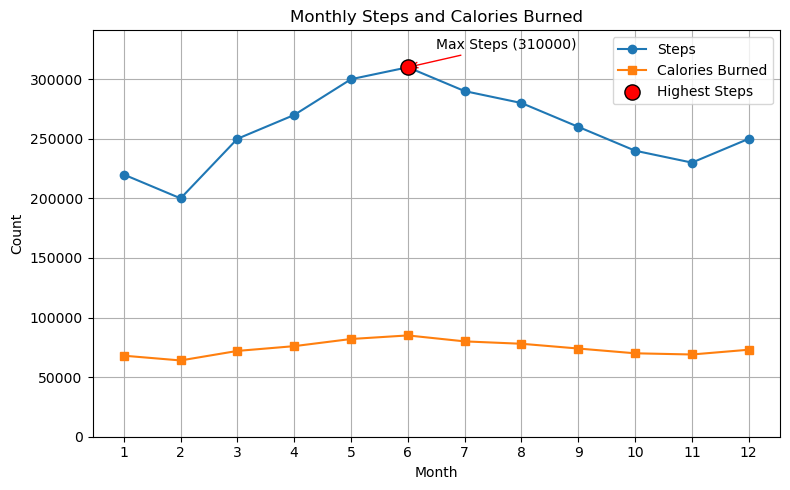

In [64]:
# Creates a line chart of monthly steps and calories burned, and highlights the month with the highest step count.
max_steps_month = health_df['Month'][health_df['Steps'].idxmax()]
max_steps_value = health_df['Steps'].max()

plt.figure(figsize=(8,5))
plt.plot(health_df['Month'], health_df['Steps'], label='Steps', marker='o')
plt.plot(health_df['Month'], health_df['Calories_Burned'], label='Calories Burned', marker='s')

plt.scatter(max_steps_month, max_steps_value, color='red', s=120, edgecolors='black', zorder=5, label='Highest Steps')

plt.ylim(0, health_df['Steps'].max()*1.1)

plt.annotate(f"Max Steps ({int(max_steps_value)})",
             xy=(max_steps_month, max_steps_value),
             xytext=(max_steps_month+0.5, max_steps_value*1.05),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=10)

plt.title('Monthly Steps and Calories Burned')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(health_df['Month'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


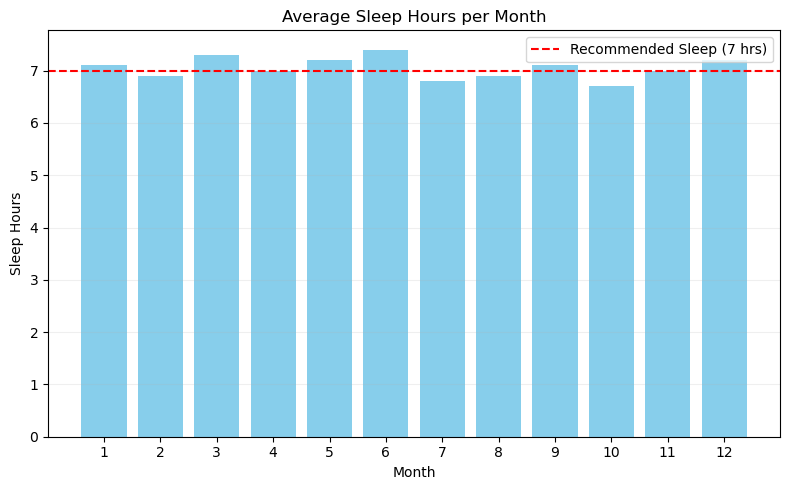

In [65]:
# Creates a bar chart of average sleep hours per month and adds a reference line for recommended sleep.
plt.figure(figsize=(8,5))
plt.bar(health_df['Month'], health_df['Sleep_Hours'], color='skyblue')

plt.axhline(7, color='red', linestyle='--', label='Recommended Sleep (7 hrs)')

plt.title('Average Sleep Hours per Month')
plt.xlabel('Month')
plt.ylabel('Sleep Hours')
plt.xticks(health_df['Month'])
plt.legend()
plt.grid(axis='y', alpha=0.2)
plt.tight_layout()
plt.show()


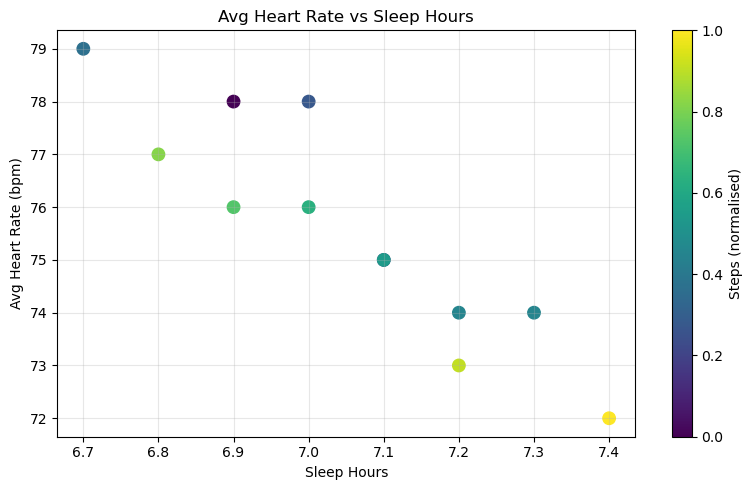

In [66]:
# Produces a scatter plot of sleep hours vs calories burned, with color coding based on normalized steps.
steps_norm = (health_df['Steps'] - health_df['Steps'].min()) / (health_df['Steps'].max() - health_df['Steps'].min())

plt.figure(figsize=(8,5))
scatter = plt.scatter(health_df['Sleep_Hours'], health_df['Avg_Heart_Rate'],
                      c=steps_norm, cmap='viridis', s=80)

plt.title('Avg Heart Rate vs Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Avg Heart Rate (bpm)')

cbar = plt.colorbar(scatter)
cbar.set_label('Steps (normalised)')

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


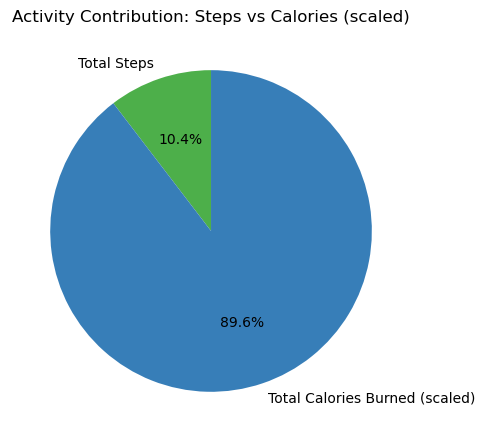

In [67]:
# Generates a pie chart comparing total yearly steps against total calories burned (scaled).
total_steps = health_df['Steps'].sum()
total_calories = health_df['Calories_Burned'].sum()*30

activity_values = [total_steps, total_calories]
labels = ['Total Steps', 'Total Calories Burned (scaled)']

plt.figure(figsize=(5,5))
plt.pie(activity_values, labels=labels, autopct='%1.1f%%',
        startangle=90, colors=['#4daf4a', '#377eb8'])
plt.title('Activity Contribution: Steps vs Calories (scaled)')
plt.tight_layout()
plt.show()


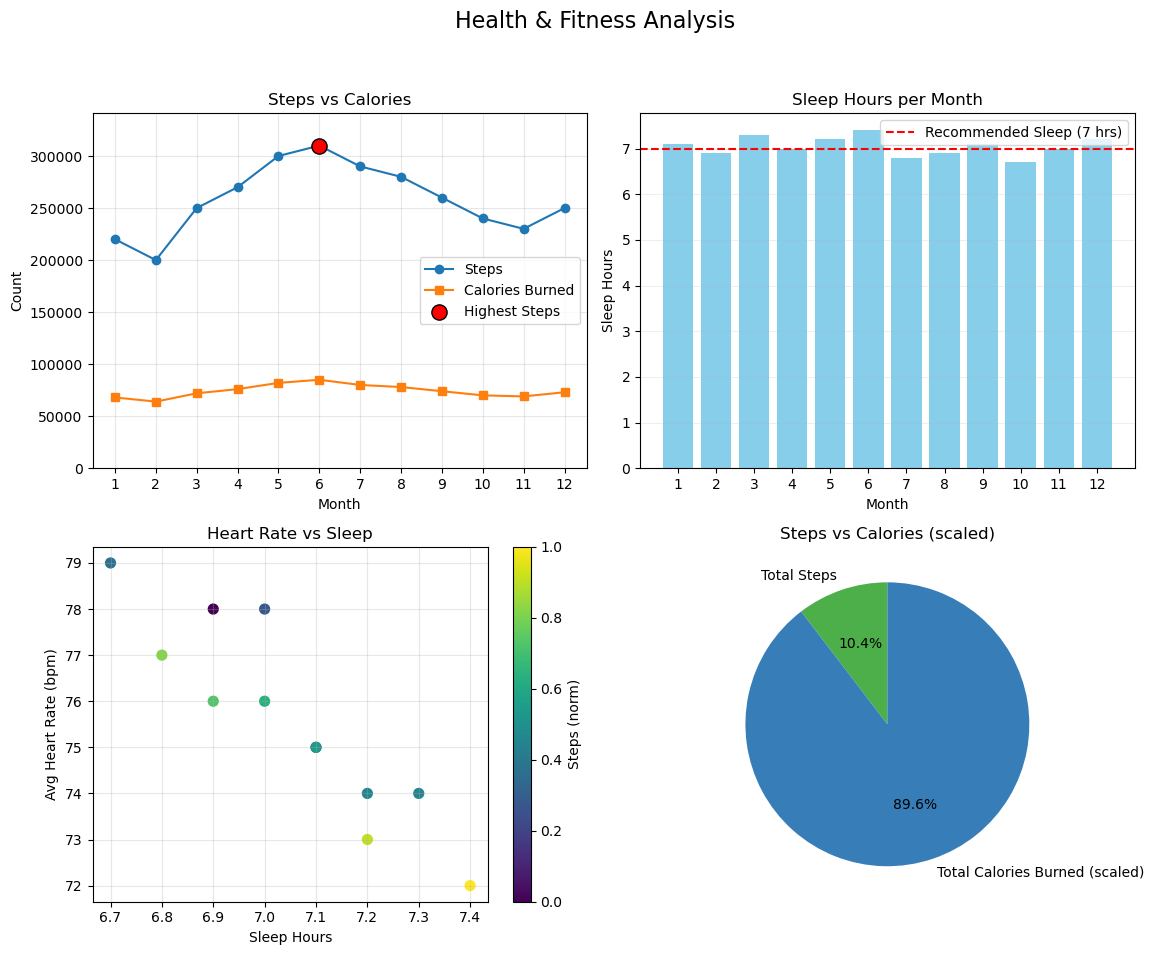

In [68]:
# Combines line, bar, scatter, and pie charts into a 2x2 subplot layout for a comprehensive dashboard and saves the figure.
fig, axes = plt.subplots(2, 2, figsize=(12,10))

axes[0,0].plot(health_df['Month'], health_df['Steps'], label='Steps', marker='o')
axes[0,0].plot(health_df['Month'], health_df['Calories_Burned'], label='Calories Burned', marker='s')
axes[0,0].scatter(max_steps_month, max_steps_value, color='red', s=120, edgecolors='black', zorder=5, label='Highest Steps')
axes[0,0].set_ylim(0, health_df['Steps'].max()*1.1)
axes[0,0].set_title('Steps vs Calories')
axes[0,0].set_xlabel('Month')
axes[0,0].set_ylabel('Count')
axes[0,0].set_xticks(health_df['Month'])
axes[0,0].legend()
axes[0,0].grid(alpha=0.3)

axes[0,1].bar(health_df['Month'], health_df['Sleep_Hours'], color='skyblue')
axes[0,1].axhline(7, color='red', linestyle='--', label='Recommended Sleep (7 hrs)')
axes[0,1].set_title('Sleep Hours per Month')
axes[0,1].set_xlabel('Month')
axes[0,1].set_ylabel('Sleep Hours')
axes[0,1].set_xticks(health_df['Month'])
axes[0,1].legend()
axes[0,1].grid(axis='y', alpha=0.2)

scatter2 = axes[1,0].scatter(health_df['Sleep_Hours'], health_df['Avg_Heart_Rate'], c=steps_norm, cmap='viridis', s=50)
axes[1,0].set_title('Heart Rate vs Sleep')
axes[1,0].set_xlabel('Sleep Hours')
axes[1,0].set_ylabel('Avg Heart Rate (bpm)')
axes[1,0].grid(alpha=0.3)
cbar = fig.colorbar(scatter2, ax=axes[1,0])
cbar.set_label('Steps (norm)')

total_steps = health_df['Steps'].sum()
total_calories = health_df['Calories_Burned'].sum() * 30

activity_values = [total_steps, total_calories]
labels = ['Total Steps', 'Total Calories Burned (scaled)']

axes[1,1].pie(activity_values, labels=labels, autopct='%1.1f%%',
              startangle=90, colors=['#4daf4a', '#377eb8'])
axes[1,1].set_title('Steps vs Calories (scaled)')


fig.suptitle('Health & Fitness Analysis', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.savefig('health_report.png')
plt.show()


## Problem Set‑2


In [69]:
# Loads the Iris dataset into a DataFrame.
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

iris_df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


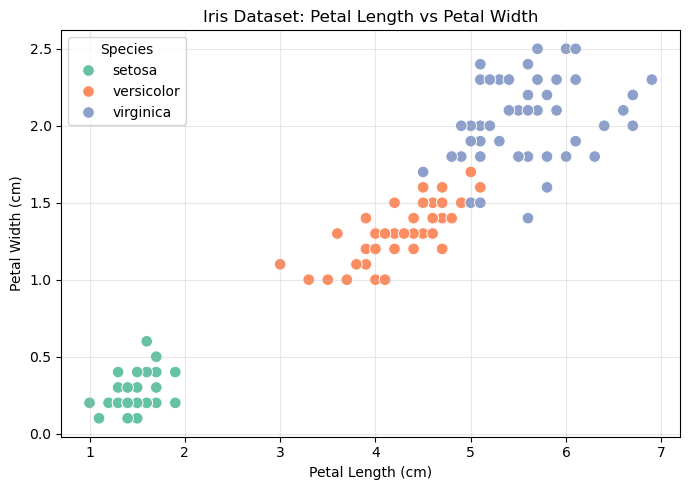

In [70]:
# Plots a 2D scatter plot of petal length vs petal width colored by species.
plt.figure(figsize=(7,5))
sns.scatterplot(data=iris_df, x='petal_length', y='petal_width', hue='species', palette='Set2', s=70)
plt.title('Iris Dataset: Petal Length vs Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Species')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


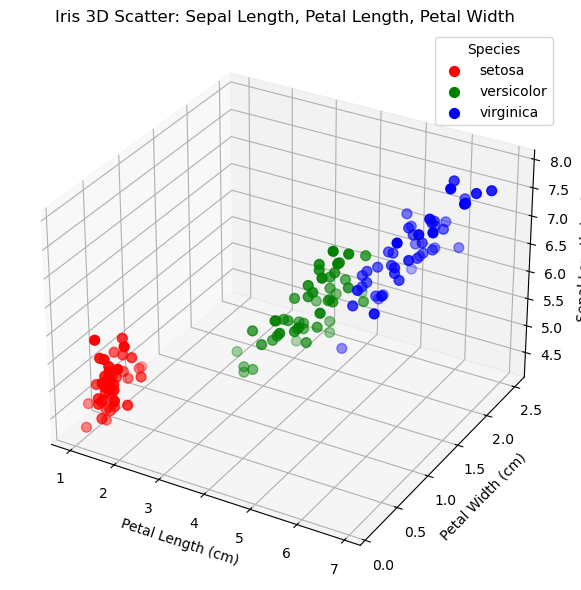

In [71]:
# Creates a 3D scatter plot of sepal and petal measurements to visualize species separation.
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
species_unique = iris_df['species'].unique()
colors_map = {'setosa':'red', 'versicolor':'green', 'virginica':'blue'}

for species in species_unique:
    subset = iris_df[iris_df['species'] == species]
    ax.scatter(subset['petal_length'], subset['petal_width'], subset['sepal_length'],
               c=colors_map[species], label=species, s=50)

ax.set_title('Iris 3D Scatter: Sepal Length, Petal Length, Petal Width')
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')
ax.set_zlabel('Sepal Length (cm)')
ax.legend(title='Species')

plt.tight_layout()
plt.show()


**Answer:**  
2D scatter plots are usually more effective for quick and clear separation of species, especially *setosa*.  
3D plots add depth and can help explore overlaps (like *versicolor* vs *virginica*), but are harder to interpret in static form.  


### Lab 6 – Seaborn Visualisation

Using the heart disease dataset, this lab guides you through several Seaborn visualisations:

- **Pairplot:** examine relationships between age, cholesterol, max heart rate, and disease status with colour‑coded scatter/histogram grids【573495246635617†L443-L447】.
- **Boxplots and Violin plots:** compare distributions of resting blood pressure and cholesterol by disease status and sex, and visualise distributions of max heart rate and age split by disease or sex【573495246635617†L449-L456】.
- **Heatmap:** compute a correlation matrix for numerical features and annotate a heatmap to identify variables correlated with disease【573495246635617†L457-L460】.
- **Jointplot:** plot age vs max heart rate using scatter and KDE joint plots to explore relationships【573495246635617†L461-L465】.
- **Barplots:** visualise average max heart rate by chest pain type and average cholesterol by sex, grouping by disease status【573495246635617†L466-L469】.


# Lab 6


In [72]:
# Loads the heart disease dataset and displays its head.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

heart = pd.read_csv('heart.csv')
heart.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [73]:
# Prints information and descriptive statistics of the heart dataset.
heart.info()
heart.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Task 1: Pairplot


<Figure size 1200x1200 with 0 Axes>

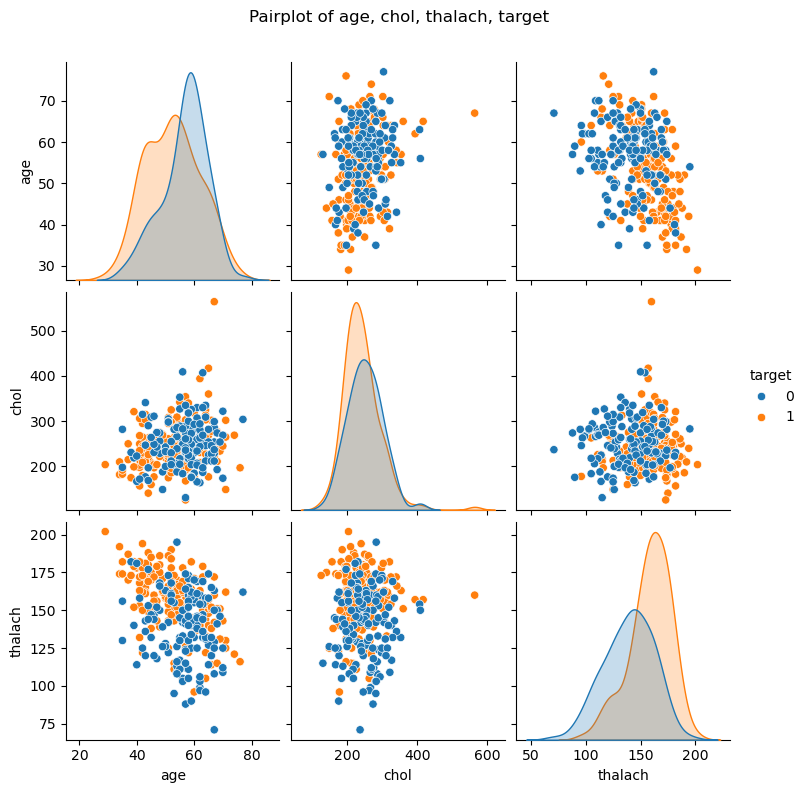

In [74]:
# Creates a pairplot for age, cholesterol, max heart rate, and target variables with hue for target.
cols = ['age','chol','thalach','target']
plt.figure(figsize=(12,12))
sns.pairplot(heart[cols], hue='target', diag_kind='kde')
plt.suptitle('Pairplot of age, chol, thalach, target', y=1.05)
plt.show()


From the pairplot, we can see some visible clustering between the two target groups.  
- Patients with heart disease target = 1 generally have **higher max heart rate (thalach)** and are spread across different ages.  
- Patients without heart disease target = 0 tend to have **slightly higher cholesterol (chol)** and **lower thalach**.  

The scatterplots don’t show a perfect separation, but there is a **clear trend** that helps distinguish the two groups.


## Task 2: Boxplot


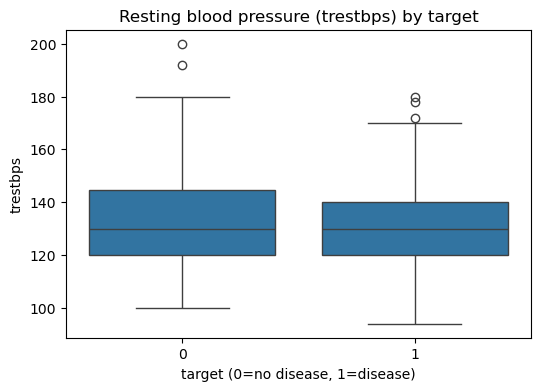

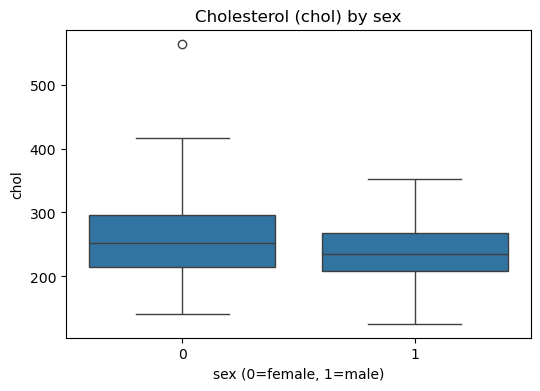

In [75]:
# Draws boxplots of resting blood pressure by target and cholesterol by sex.
plt.figure(figsize=(6,4))
sns.boxplot(x='target', y='trestbps', data=heart)
plt.title('Resting blood pressure (trestbps) by target')
plt.xlabel('target (0=no disease, 1=disease)')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='sex', y='chol', data=heart)
plt.title('Cholesterol (chol) by sex')
plt.xlabel('sex (0=female, 1=male)')
plt.show()



- For trestbps (resting blood pressure), the distributions of target=0 and target=1 look quite similar, but the spread is slightly different.  
- For chol (cholesterol), males sex=1 and females sex=0 have overlapping distributions, though the median cholesterol appears a bit higher for males.  

Overall, there are some small differences, but the groups are not completely separate.


## Task 3: Violin Plot

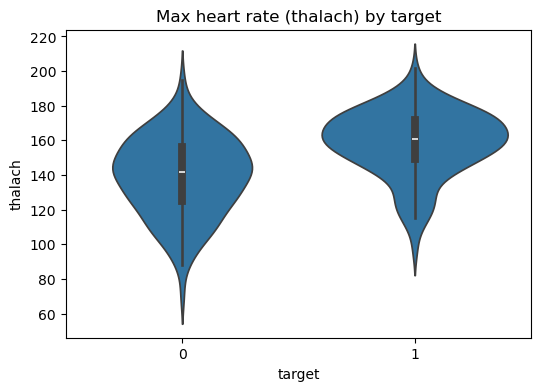

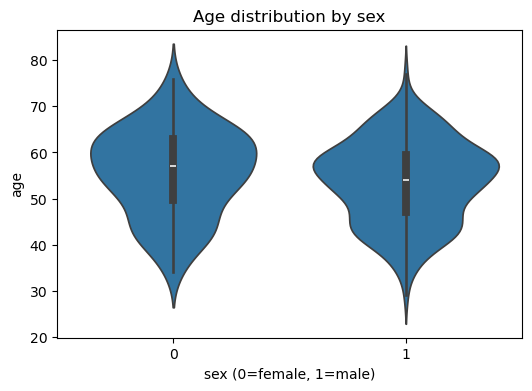

In [76]:
# Plots violin plots of max heart rate by target and (in a separate cell) another for age by sex.
plt.figure(figsize=(6,4))
sns.violinplot(x='target', y='thalach', data=heart, split=False)
plt.title('Max heart rate (thalach) by target')
plt.show()

plt.figure(figsize=(6,4))
sns.violinplot(x='sex', y='age', data=heart)
plt.title('Age distribution by sex')
plt.xlabel('sex (0=female, 1=male)')
plt.show()



### Interpretation 

For thalach, patients with target=1 have a lower median and a slightly smaller spread compared to target=0.  
For age, the median is almost the same for both sexes, but the spread is a bit wider for males.


## Task 4: Heatmap

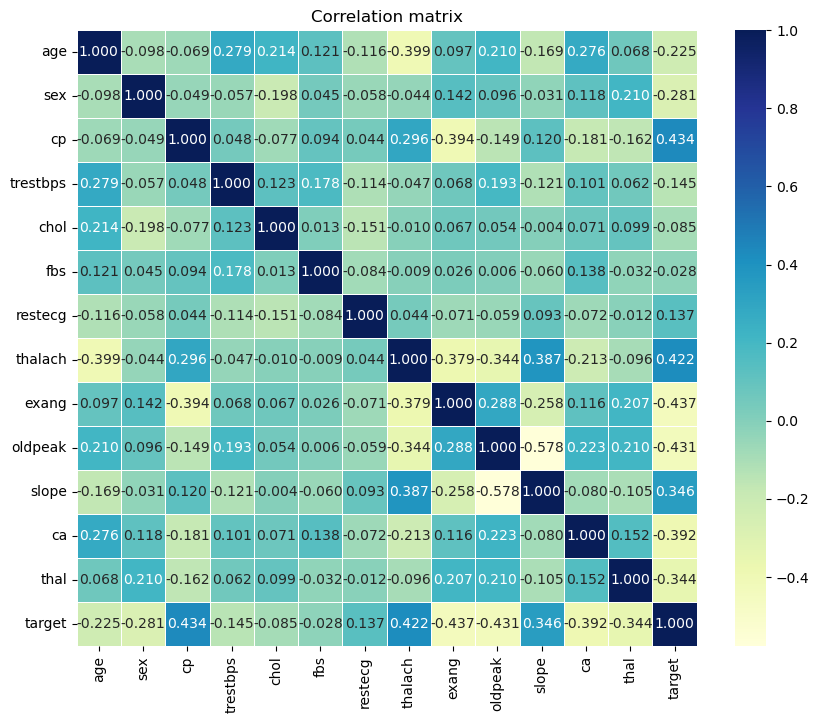


Correlations with target:
target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64


In [77]:
# Computes a correlation matrix for numerical features and plots a heatmap with annotations.
num_cols = heart.select_dtypes(include=['number']).columns
corr = heart[num_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.3f', cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation matrix')
plt.show()

print('\nCorrelations with target:')
print(corr['target'].sort_values(ascending=False))


## Task 5: Jointplot

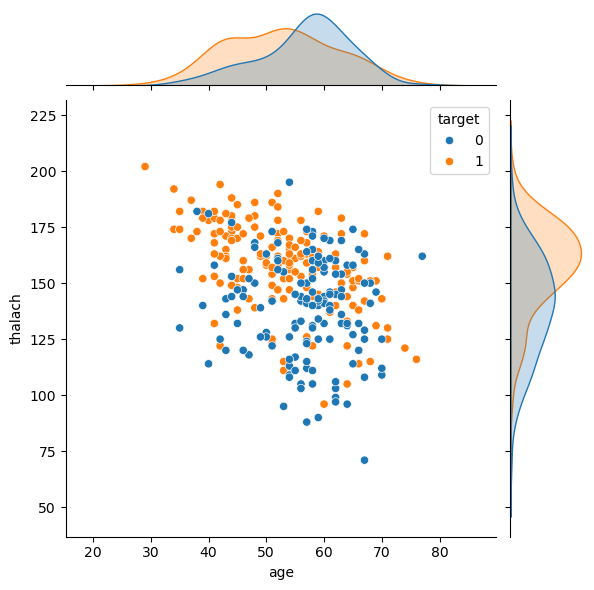

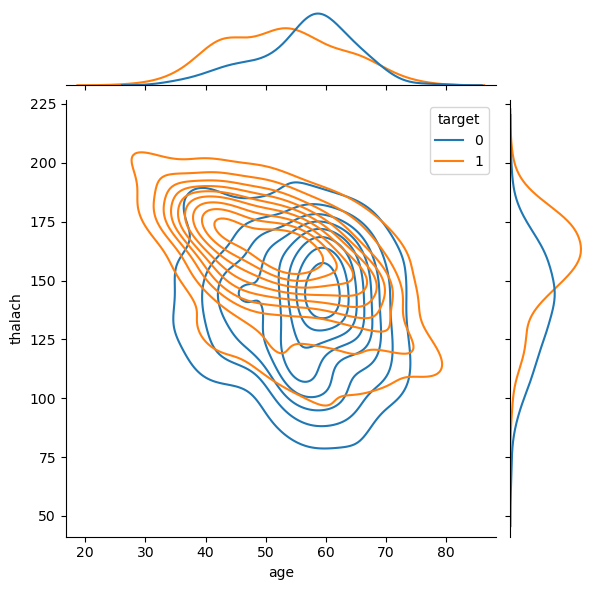

In [78]:
# Creates scatter and KDE joint plots of age versus max heart rate colored by target.
sns.jointplot(x="age", y="thalach", data = heart, hue = "target" , kind="scatter")
plt.show()

sns.jointplot(x="age", y="thalach", data = heart, hue="target", kind="kde")
plt.show()


Younger patients tend to achieve higher maximum heart rates (thalach), while older patients usually have lower values.  
The plots also show some separation between the target groups, with target=1 patients often having lower thalach compared to target=0.


## Task 6: Barplot


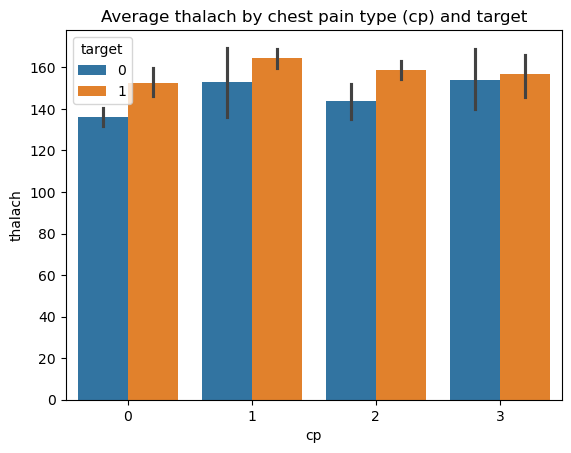

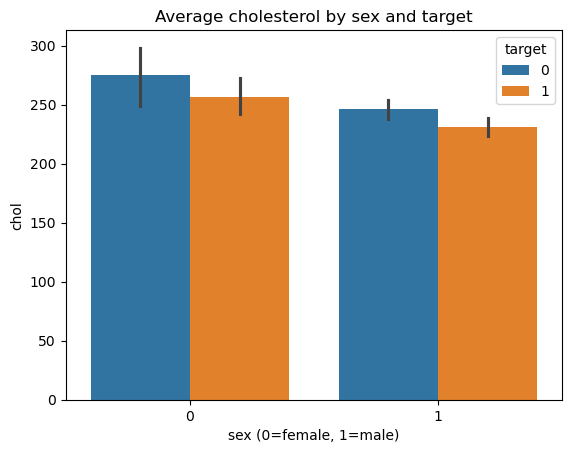

In [79]:
# Generates barplots of chest pain type vs average max heart rate and sex vs average cholesterol, both with target as hue.

sns.barplot(x='cp', y='thalach', data=heart, hue='target')
plt.title('Average thalach by chest pain type (cp) and target')
plt.show()

sns.barplot(x='sex', y='chol', data=heart, hue='target')
plt.title('Average cholesterol by sex and target')
plt.xlabel('sex (0=female, 1=male)')
plt.show()


For chest pain type (cp), the average thalach is higher in some cp groups, especially for patients with target=1.  
For sex, males and females show some difference in average cholesterol, with females usually having a slightly higher value.  


### Assignment 1 – Academic Records Analysis

For Assignment 1 you design three classes—`Student`, `Department`, and `Institute`—to model academic records.  Each `Student` stores a name, roll number and an array of subject scores and provides methods for average, highest, lowest score and standard deviation.  The `Department` holds a list of students and can compute subject‑wise averages, identify the top student, the weakest subject, and rank students.  The `Institute` aggregates departments and provides overall subject averages, the best department and the overall topper, along with a search by roll number.  You should also create multiple departments, add at least five students per department, and perform analyses at both department and institute levels.


In [80]:
# Imports NumPy library.
import numpy as np

In [83]:
class Student:

    def __init__(self, name: str, roll_number: int, scores: np.ndarray):
        self.name = name
        self.roll_number = roll_number
        self.scores = np.array(scores, dtype=float)

    def average(self):
        return float(self.scores.mean())

    def highest_score(self):
        return float(self.scores.max())

    def lowest_score(self):
        return float(self.scores.min())

    def standard_deviation(self):
        return float(self.scores.std())

    def __gt__(self, other: "Student") :
        return self.average() > other.average()

In [84]:

class Department:

    def __init__(self, dept_name: str, students = None):
        self.dept_name = dept_name
        if students is None:
            self.students = []  
        else:
            self.students = list(students)

    def add_student(self, student: Student):
        self.students.append(student)

    def department_average(self):
        
        if not self.students:
            return np.array([])

        score_rows = []
        for st in self.students:
            score_rows.append(st.scores)
    
        score_matrix = np.vstack(score_rows)
        return score_matrix.mean(axis=0)

    def department_mean(self):
        if not self.students:
            return 0.0
        return float(np.mean([st.average() for st in self.students]))

    def topper(self):
        
        if not self.students:
            return None

        top_student = self.students[0]
        for st in self.students:
            if st.average() > top_student.average():
                top_student = st
        return top_student

    def weakest_subject(self):
        if not self.students:
            return None

        subject_averages = self.department_average()
        return int(np.argmin(subject_averages))

    def rank_students(self) -> list[Student]:
        students_copy = self.students[:]
        students_copy.sort(key=lambda s: s.average(), reverse=True)
        return students_copy


In [85]:

class Institute:

    def __init__(self, departments = None):
        if departments is None:
            self.departments = [] 
        else:
            self.departments = list(departments)

    def add_department(self, dept: Department):
        self.departments.append(dept)

    def institute_average(self):
        if not self.departments:
            return np.array([])
            
        dept_means = []
        for dept in self.departments:
            dept_means.append(dept.department_mean())
         
        return np.array(dept_means, dtype=float)
         

    def best_department(self):
        if not self.departments:
            return None

        best_dept = self.departments[0]
        best_avg = best_dept.department_average().mean()
        for dept in self.departments:
            dept_avg = dept.department_average().mean()
            if dept_avg > best_avg:
                best_dept = dept
                best_avg = dept_avg
        return best_dept

    def overall_topper(self):
        top_student = None 
        for dept in self.departments:
            for st in dept.students:
                if top_student is None:
                    top_student = st
                else:
                    if st.average() > top_student.average():
                            top_student = st
        return top_student


    def search_student(self, roll_number: int):
        for dept in self.departments:
            for student in dept.students:
                if student.roll_number == roll_number:
                    return student
        return None


In [86]:
def print_student_statistics(student: Student) :
    print(f"Name: {student.name}, Roll: {student.roll_number}")
    print(f"  Average score      : {student.average():.2f}")
    print(f"  Highest score      : {student.highest_score():.2f}")
    print(f"  Lowest score       : {student.lowest_score():.2f}")
    print(f"  Standard deviation : {student.standard_deviation():.2f}")

In [87]:

CSE_SUBJECTS = ["DSA", "OS", "DBMS", "AI", "ML", "Networks"]
EE_SUBJECTS  = ["Circuits", "Signals", "Control", "Power", "EMI", "VLSI"]
ME_SUBJECTS  = ["Thermo", "Fluid", "SolidMech", "Dynamics", "Manufacturing", "Design"]

CSE_INDEX = {name: i for i, name in enumerate(CSE_SUBJECTS)}
EE_INDEX  = {name: i for i, name in enumerate(EE_SUBJECTS)}
ME_INDEX  = {name: i for i, name in enumerate(ME_SUBJECTS)}


cse_dept = Department("CSE")
ee_dept  = Department("EE")
me_dept  = Department("ME")

cse_students = [
    ("Rohan",   "M25CS101", [85, 88, 80, 78, 90, 92]),
    ("Sarvesh", "M25CS102", [78, 75, 82, 85, 79, 81]),
    ("Surya",   "M25CS103", [90, 92, 88, 91, 89, 93]),
    ("Vedant",  "M25CS104", [70, 68, 72, 74, 69, 71]),
    ("Om Raj",  "M25CS105", [88, 85, 90, 87, 86, 89]),
    ("Ankit",   "M25CS106", [84, 82, 79, 83, 85, 80]),
]
for name, roll, scores in cse_students:
    cse_dept.add_student(Student(name, roll, scores))

ee_students = [
    ("Rahul",  "M25EE201", [80, 75, 78, 82, 76, 79]),
    ("Raj",    "M25EE202", [90, 92, 88, 95, 91, 93]),
    ("Suresh", "M25EE203", [65, 70, 68, 72, 69, 71]),
    ("Vivek",  "M25EE204", [85, 80, 83, 79, 82, 84]),
    ("Ujjwal", "M25EE205", [95, 96, 94, 97, 93, 92]),
    ("Mohan",  "M25EE206", [77, 74, 79, 81, 76, 78]),
]
for name, roll, scores in ee_students:
    ee_dept.add_student(Student(name, roll, scores))

me_students = [
    ("Tushar",  "M25ME301", [78, 80, 75, 82, 79, 77]),
    ("Yash",    "M25ME302", [88, 85, 90, 87, 86, 89]),
    ("Mehul",   "M25ME303", [70, 68, 72, 69, 71, 73]),
    ("Harshit", "M25ME304", [92, 90, 94, 91, 95, 93]),
    ("Sanoop",  "M25ME305", [85, 88, 83, 86, 82, 84]),
    ("Rajat",   "M25ME306", [80, 82, 84, 81, 83, 85]),
]
for name, roll, scores in me_students:
    me_dept.add_student(Student(name, roll, scores))




In [88]:
institute = Institute([cse_dept, ee_dept, me_dept])

print("\n____ Student Level Analysis ____")
for dept in institute.departments:
    print(f"\nDepartment: {dept.dept_name}")
    for st in dept.students:
        print_student_statistics(st)
        print("\n")

print("\n____ Department Level Analysis ____")
for dept in institute.departments:
    print(f"\nDepartment: {dept.dept_name}")
    avg_scores = dept.department_average()
    if avg_scores.size > 0:
        print("Subject-wise averages:")
        if dept.dept_name == "CSE":
            for sub, idx in CSE_INDEX.items():
                print(f"  {sub}: {avg_scores[idx]:.2f}")
        elif dept.dept_name == "EE":
            for sub, idx in EE_INDEX.items():
                print(f"  {sub}: {avg_scores[idx]:.2f}")
        elif dept.dept_name == "ME":
            for sub, idx in ME_INDEX.items():
                print(f"  {sub}: {avg_scores[idx]:.2f}")
    print(f"Department mean: {dept.department_mean():.2f}")
    
    top = dept.topper()
    if top is not None:
        print(f"Topper: {top.name} (Roll {top.roll_number}) with average {top.average():.2f}")
        
    weak_idx = dept.weakest_subject()
    if weak_idx is not None:
        if dept.dept_name == "CSE":
            sub_name = CSE_SUBJECTS[weak_idx]
        elif dept.dept_name == "EE":
            sub_name = EE_SUBJECTS[weak_idx]
        else:
            sub_name = ME_SUBJECTS[weak_idx]
        print(f"Weakest subject : {sub_name}")
        
    ranked = dept.rank_students()
    print("Ranking :")
    for rank, student in enumerate(ranked, start=1):
        print(f"  {rank}. {student.name} (Avg: {student.average():.2f})")



____ Student Level Analysis ____

Department: CSE
Name: Rohan, Roll: M25CS101
  Average score      : 85.50
  Highest score      : 92.00
  Lowest score       : 78.00
  Standard deviation : 5.09


Name: Sarvesh, Roll: M25CS102
  Average score      : 80.00
  Highest score      : 85.00
  Lowest score       : 75.00
  Standard deviation : 3.16


Name: Surya, Roll: M25CS103
  Average score      : 90.50
  Highest score      : 93.00
  Lowest score       : 88.00
  Standard deviation : 1.71


Name: Vedant, Roll: M25CS104
  Average score      : 70.67
  Highest score      : 74.00
  Lowest score       : 68.00
  Standard deviation : 1.97


Name: Om Raj, Roll: M25CS105
  Average score      : 87.50
  Highest score      : 90.00
  Lowest score       : 85.00
  Standard deviation : 1.71


Name: Ankit, Roll: M25CS106
  Average score      : 82.17
  Highest score      : 85.00
  Lowest score       : 79.00
  Standard deviation : 2.11



Department: EE
Name: Rahul, Roll: M25EE201
  Average score      : 78.33
  

In [89]:
print("\n____ Institute Level Analysis _____")
inst_avgs = institute.institute_average()
for dept, val in zip(institute.departments, inst_avgs):
    print(f"{dept.dept_name}: {val:.2f}")

best_dept = institute.best_department()
if best_dept is not None:
    print(f"Best department: {best_dept.dept_name} ({best_dept.department_mean():.2f})")

top_student = institute.overall_topper()
if top_student is not None:
    print(f"Overall topper: {top_student.name} (Roll {top_student.roll_number}) with average {top_student.average():.2f}")

print("\n____Student Search _______")
search_roll = "M25EE202"
found = institute.search_student(search_roll)
if found:
    dept_name = None
    for dept in institute.departments:
        if found in dept.students:
            dept_name = dept.dept_name
            break
    print(f"Student with roll {search_roll} found: {found.name}, Department: {dept_name}")
else:
    print(f"Student with roll {search_roll} not found in the institute.")





____ Institute Level Analysis _____
CSE: 82.72
EE: 82.19
ME: 82.69
Best department: CSE (82.72)
Overall topper: Ujjwal (Roll M25EE205) with average 94.50

____Student Search _______
Student with roll M25EE202 found: Raj, Department: EE
